Autores
Omar Alonso Manzano Favela
2077826
Alfonso Antonio García Granados
1959218
Jesús Iván Oviedo Molina
1970648
Alan Oliverio Rodriguez Olazaran 
1868812
Juan Pablo Espinoza Gutierrez
 1814062
Alejandro de Jesús Gasca Godinez
2077366

**PASO 1. IMPORTAR LIBRERÍAS**

In [2]:
##Librerías Importadas
import numpy as np                                  
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from PIL import Image
import warnings
from PIL import Image
import cv2 as cv
from tensorflow import keras
from tensorflow.keras import models, layers
import os
import random

**PASO 2. CARGAR DATOS**

In [3]:
train_images = '/kaggle/input/animals10/raw-img'
test_images = '/kaggle/input/animals10/raw-img'

train_labels = tf.keras.utils.image_dataset_from_directory(train_images)
test_labels= tf.keras.utils.image_dataset_from_directory(test_images)

Found 26179 files belonging to 10 classes.
Found 26179 files belonging to 10 classes.


**PASO 3. CREAR ETIQUETAS Y SETS DE ENTRENAMIENTO**

In [4]:
## Clases y numero de Clases  
animals = train_labels.class_names
print(animals)
print(len(animals))


['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
10


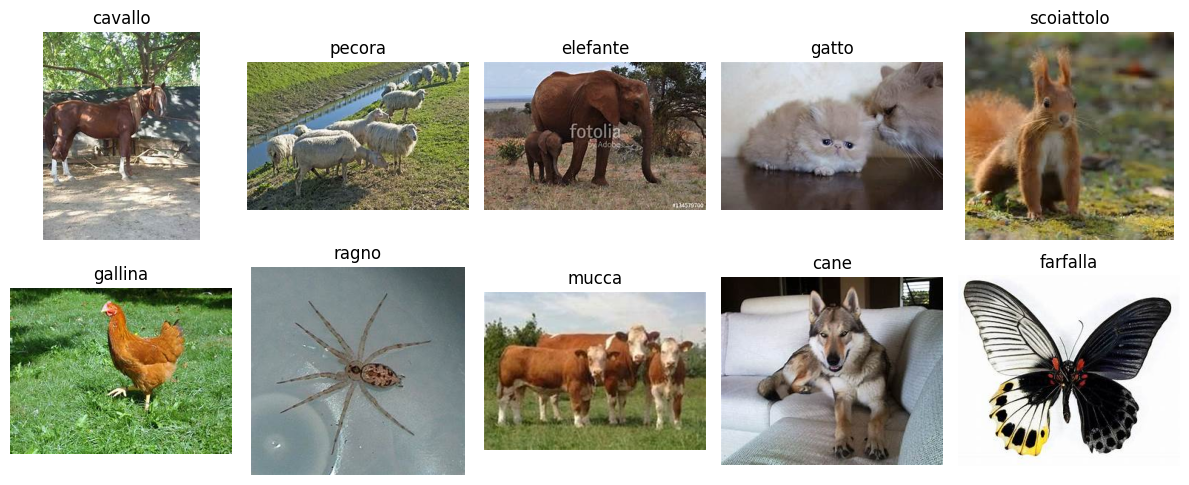

In [5]:
import os 

train_dir = "/kaggle/input/animals10/raw-img"

image_categories = os.listdir(train_dir)

plt.figure(figsize=(12, 12))

for i, category in enumerate(image_categories):
    image_files = os.listdir(os.path.join(train_dir, category))
    image_file = image_files[0]
    image_path = os.path.join(train_dir, category, image_file)
    image = Image.open(image_path)
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(category)
    plt.axis('off')

plt.tight_layout()

**PASO 4. SELECCIÓN DE MODELO**

In [6]:
## definir el modelo secuencial de la red 
model = Sequential()  

In [7]:
## Modelo convulcional 
model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=(256, 256, 3))) 

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())







In [8]:
##Clasificacion
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(animals)))

In [9]:
#compilacion 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [10]:
model.summary() #datos


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)       

**PASO 5. ENTRENAMIENTO**

In [11]:
history = model.fit(train_labels, validation_data= test_labels, epochs=10)

Epoch 1/10
819/819 [==============================] - 1191s 1s/step - loss: 1.8229 - accuracy: 0.3654 - val_loss: 1.4864 - val_accuracy: 0.4913
Epoch 2/10
819/819 [==============================] - 1143s 1s/step - loss: 1.3899 - accuracy: 0.5180 - val_loss: 1.1862 - val_accuracy: 0.5979
Epoch 3/10
819/819 [==============================] - 1104s 1s/step - loss: 1.1940 - accuracy: 0.5882 - val_loss: 1.0826 - val_accuracy: 0.6263
Epoch 4/10
819/819 [==============================] - 1085s 1s/step - loss: 1.0312 - accuracy: 0.6481 - val_loss: 0.8551 - val_accuracy: 0.7140
Epoch 5/10
819/819 [==============================] - 1087s 1s/step - loss: 0.8712 - accuracy: 0.7041 - val_loss: 0.7555 - val_accuracy: 0.7444
Epoch 6/10
819/819 [==============================] - 1088s 1s/step - loss: 0.7305 - accuracy: 0.7531 - val_loss: 0.7150 - val_accuracy: 0.7563
Epoch 7/10
819/819 [==============================] - 1075s 1s/step - loss: 0.5966 - accuracy: 0.7977 - val_loss: 0.5020 - val_accuracy:

**PASO 6. CURVA DE VALIDACIÓN VS ENTRENAMIENTO**

Text(0.5, 1.0, 'Training and Validation Accuracy')

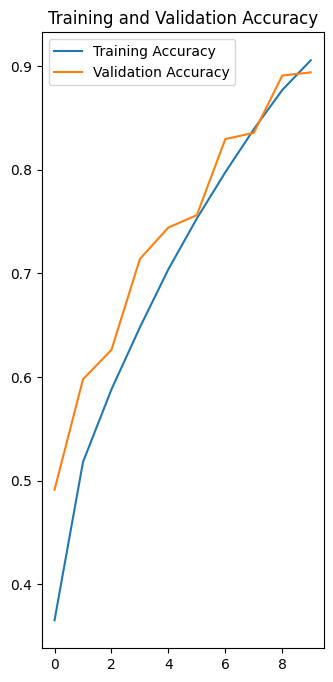

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')


**PASO 7. PRUEBA DEL MODELO**

In [13]:
image_paths = []

In [14]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)

Imagen seleccionada: /kaggle/input/animals10/raw-img/pecora/OIP-avEgQ8HWmvy1ceC4aoB_oAHaE8.jpeg


1/1 [==============================] - 0s 150ms/step
This image most likely belongs to pecora with a 98.72 percent confidence.


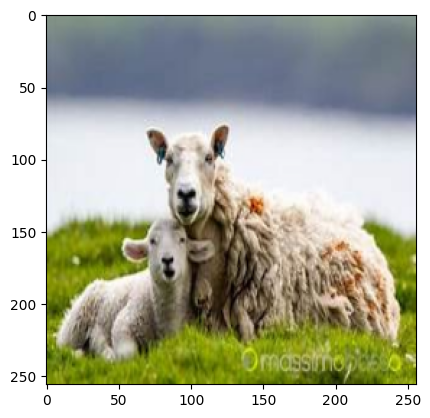

In [15]:
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()


Imagen seleccionada: /kaggle/input/animals10/raw-img/gallina/OIP-3oBZXLJvPUvO3d_fo86LaAHaIK.jpeg
1/1 [==============================] - 0s 35ms/step
This image most likely belongs to gallina with a 99.24 percent confidence.


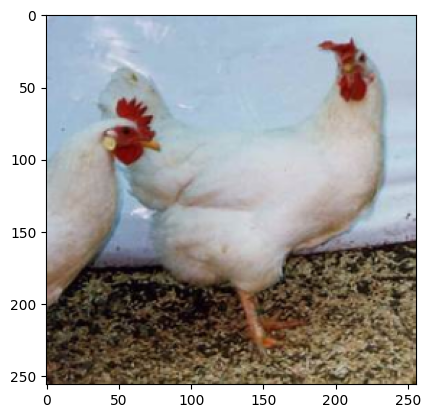

In [16]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()



Imagen seleccionada: /kaggle/input/animals10/raw-img/farfalla/OIP-1W_K0J2BGc0YqKMPuoC7kQHaHa.jpeg
1/1 [==============================] - 0s 45ms/step
This image most likely belongs to farfalla with a 99.71 percent confidence.


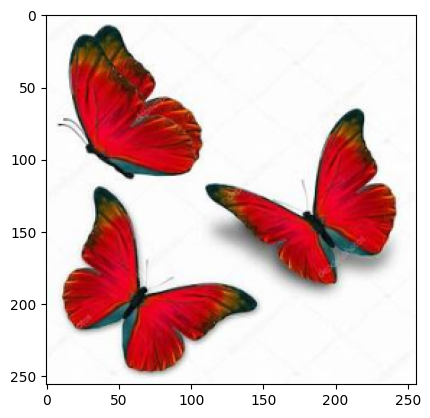

In [17]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()

Imagen seleccionada: /kaggle/input/animals10/raw-img/cane/OIP-Z4WQ8tuvB3-16SJyLE72nwHaHa.jpeg
1/1 [==============================] - 0s 37ms/step
This image most likely belongs to cane with a 98.92 percent confidence.


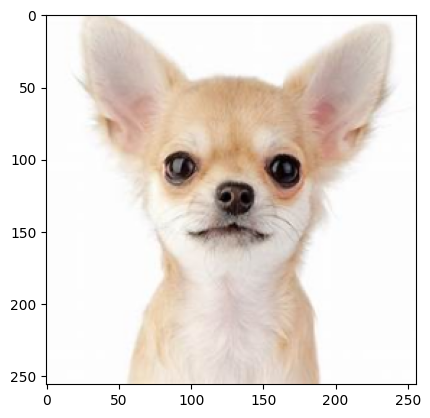

In [18]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()

Imagen seleccionada: /kaggle/input/animals10/raw-img/cavallo/OIP-1uWKZnldHYg-bcg23mB6BgHaGZ.jpeg
1/1 [==============================] - 0s 37ms/step
This image most likely belongs to ragno with a 79.41 percent confidence.


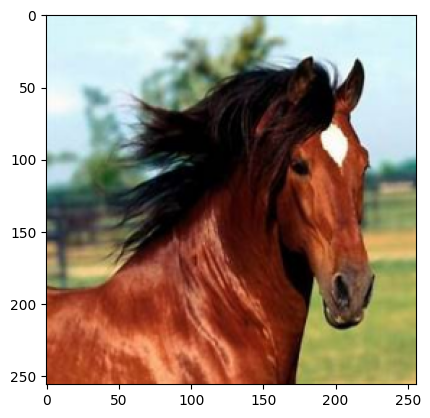

In [19]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()


Imagen seleccionada: /kaggle/input/animals10/raw-img/gallina/OIP-xRUJ5vM6GX9-kI3DoW48pQHaEw.jpeg
1/1 [==============================] - 0s 53ms/step
This image most likely belongs to cavallo with a 66.89 percent confidence.


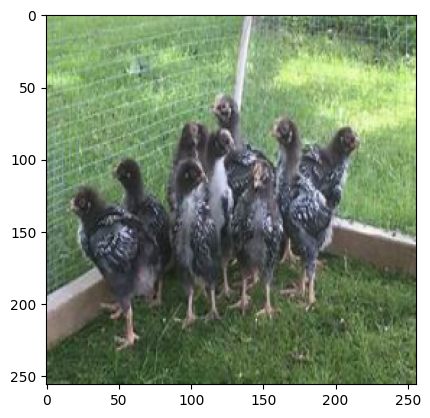

In [20]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()


Imagen seleccionada: /kaggle/input/animals10/raw-img/cane/OIP-SFEUaT-iXC8BXpAz7vIVHAHaGS.jpeg
1/1 [==============================] - 0s 41ms/step
This image most likely belongs to cane with a 77.07 percent confidence.


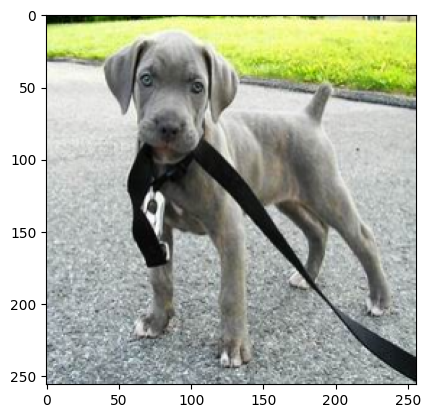

In [21]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()


Imagen seleccionada: /kaggle/input/animals10/raw-img/ragno/OIP-gCYYLiXuijIG5JSH9SHamQHaF0.jpeg
1/1 [==============================] - 0s 51ms/step
This image most likely belongs to gatto with a 65.50 percent confidence.


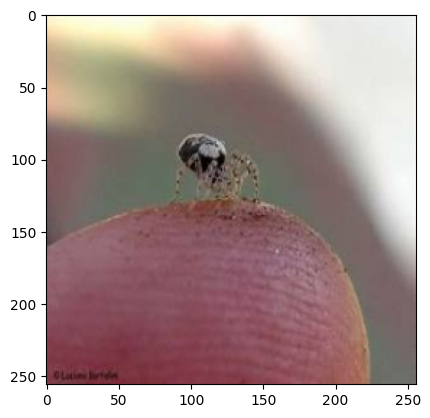

In [22]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()


Imagen seleccionada: /kaggle/input/animals10/raw-img/cane/OIP-2blBR9VXGyR_GNy3yzR1TAHaEK.jpeg
1/1 [==============================] - 0s 40ms/step
This image most likely belongs to cane with a 99.77 percent confidence.


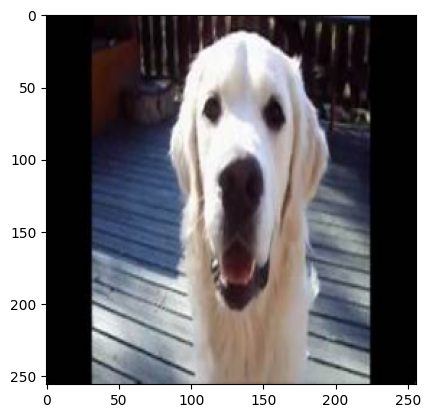

In [23]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()


Imagen seleccionada: /kaggle/input/animals10/raw-img/ragno/OIP-3j6ONDcBDTFDTOwHVkyEDAHaC4.jpeg
1/1 [==============================] - 0s 37ms/step
This image most likely belongs to ragno with a 100.00 percent confidence.


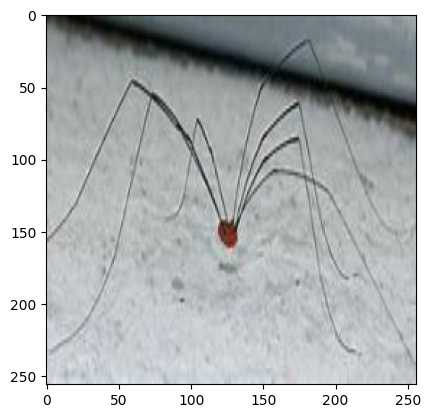

In [24]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()


Imagen seleccionada: /kaggle/input/animals10/raw-img/cane/OIP-qEzQEjpT0w9K9rrYtz9m4QHaFj.jpeg
1/1 [==============================] - 0s 39ms/step
This image most likely belongs to mucca with a 45.25 percent confidence.


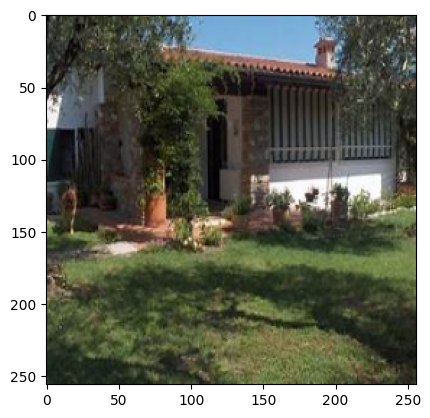

In [25]:
folder_path = '/kaggle/input/animals10/raw-img'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(animals[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()
